In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [47]:
df=pd.read_csv("dataset.csv")
df

,title,link,description,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,Join Our Growing Team!We are an innovative com...,2024-02-17 09:08:08+00:00,NaN,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...,...
53053,Partial Migration From WordPress to Shopify,https://www.upwork.com/jobs/Partial-Migration-...,We're moving from Wordpress to Shopify. The Sh...,2024-02-14 06:40:39+00:00,False,NaN,NaN,150.0,Australia
53054,Logo work &amp; Event Booth Rendering,https://www.upwork.com/jobs/Logo-work-amp-Even...,I need some art works rendered in to booth des...,2024-02-14 06:40:26+00:00,False,NaN,NaN,30.0,United States
53055,Wedding Dress Collection Photographer,https://www.upwork.com/jobs/Wedding-Dress-Coll...,We are looking for a skilled photographer to c...,2024-02-14 06:40:06+00:00,True,23.0,51.0,NaN,Australia
53056,Design a startup profile,https://www.upwork.com/jobs/Design-startup-pro...,I building a startup company and I want to des...,2024-02-14 06:40:06+00:00,False,NaN,NaN,70.0,Saudi Arabia


### Dataset Preprocessing / Cleaning


In [48]:
df.dtypes

title              object
link               object
description        object
published_date     object
is_hourly          object
hourly_low        float64
hourly_high       float64
budget            float64
country            object
dtype: object

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df.isna().sum()

title                 0
link                  0
description           0
published_date        0
is_hourly          8229
hourly_low        30102
hourly_high       30897
budget            31185
country            1141
dtype: int64

In [51]:
df = df.dropna(subset=['is_hourly'])

In [52]:
df=df.drop(columns='link')

In [53]:
df['country'] = df['country'].fillna('Anywhere')

In [54]:
df['hourly_low'] = df['hourly_low'].fillna(0)
df['hourly_high'] = df['hourly_high'].fillna(0)
df['budget'] = df['budget'].fillna(0)

In [55]:
lst=list(df['country'].unique())

In [56]:
df.reset_index(drop=True,inplace=True)

### EDA

In [57]:
df['is_hourly'].value_counts()

is_hourly
True     22956
False    21873
Name: count, dtype: int64

In [58]:
df.groupby('is_hourly')['hourly_high'].describe()

,count,mean,std,min,25%,50%,75%,max
is_hourly,,,,,,,,
False,21873.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
True,22956.0,40.167102,47.740698,0.0,18.0,30.0,50.0,999.0


In [59]:
df.groupby('is_hourly')['title'].value_counts(normalize=True)

is_hourly  title                                                                          
False      Logo design                                                                        0.001372
           Logo Design                                                                        0.001189
           Graphic Designer                                                                   0.001006
           Social Media Manager                                                               0.001006
           Udemy                                                                              0.000869
                                                                                                ...   
True       ⭐️ TikTok Ads Expert for Mobile App                                                0.000044
           【Today!】Simple task for French Speakers in the world                               0.000044
           【Today!】Simple task for Mandarin Chinese &amp; Vietnamese Speakers in the 

<Axes: xlabel='hourly_low', ylabel='Count'>

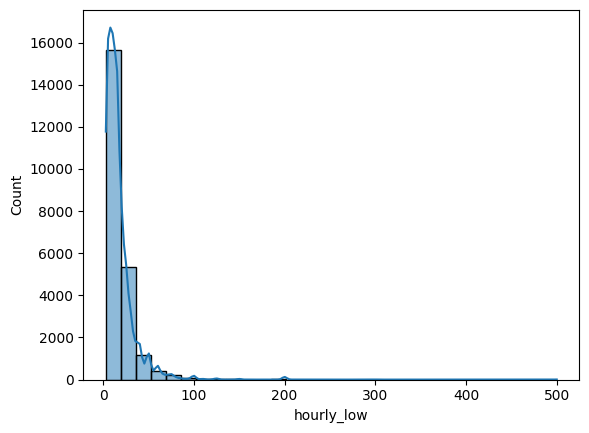

In [60]:
sns.histplot(df[df['is_hourly'] == True]['hourly_low'], bins=30, kde=True)

<Axes: xlabel='hourly_high', ylabel='Count'>

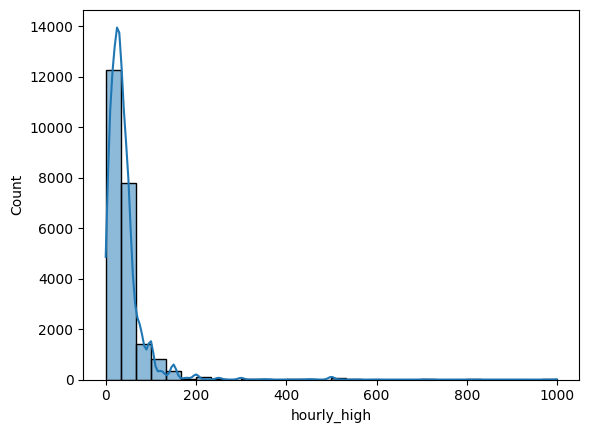

In [61]:
sns.histplot(df[df['is_hourly'] == True]['hourly_high'], bins=30, kde=True)

<Axes: xlabel='budget', ylabel='Count'>

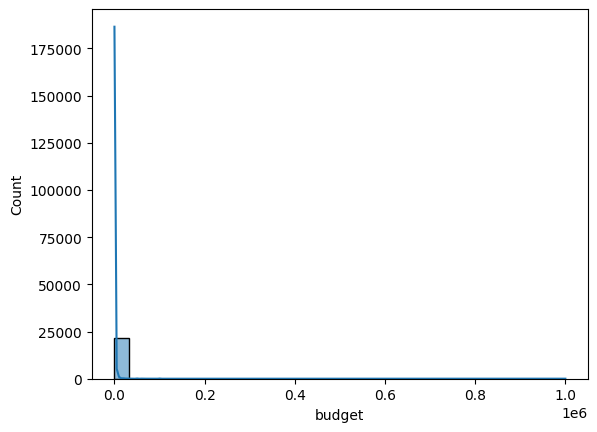

In [62]:
sns.histplot(df[df['is_hourly'] == False]['budget'], bins=30, kde=True)

<Axes: ylabel='country'>

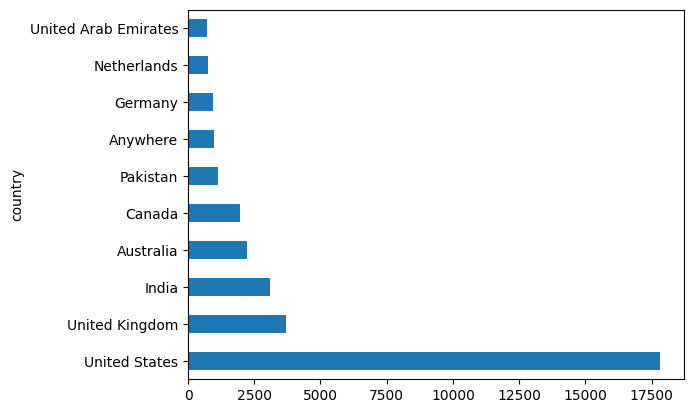

In [63]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh')

In [64]:
df['title'].value_counts().head(10)

title
Virtual Assistant                                       79
Social Media Manager                                    78
Graphic Designer                                        55
Simple copy and paste data from a webpage into excel    49
Logo Design                                             44
Video Editor                                            42
Logo design                                             38
Website Development                                     35
Full Stack Developer                                    29
Data Entry Specialist                                   27
Name: count, dtype: int64

<Axes: xlabel='description_length', ylabel='Count'>

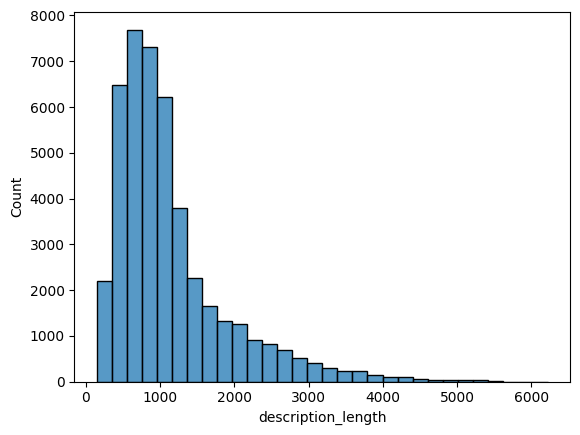

In [65]:
df['description_length'] = df['description'].str.len()
sns.histplot(df['description_length'], bins=30)

In [66]:
df.groupby('country')[['hourly_low', 'hourly_high']].mean().sort_values('hourly_high', ascending=False).head(10)

,hourly_low,hourly_high
country,,
Malawi,22.0,65.0
Bhutan,30.0,46.0
Angola,20.0,45.5
Benin,20.0,40.0
Guinea,12.0,40.0
Seychelles,14.0,37.5
Timor-Leste,15.0,35.0
Antigua and Barbuda,2.5,35.0
Mali,15.0,32.5


In [67]:
df.groupby('country')['budget'].mean().sort_values(ascending=False).head(10)

country
Barbados          8381.666667
Philippines       3128.401042
Slovakia          3008.611111
Czech Republic    2936.650943
Belarus           2500.000000
Myanmar           2250.000000
Aland Islands     2000.000000
Gibraltar         1968.333333
Bangladesh        1892.141379
Zimbabwe          1514.285714
Name: budget, dtype: float64

In [68]:
df['is_hourly'].value_counts(normalize=True)

df.groupby('is_hourly')[['hourly_low', 'hourly_high', 'budget']].mean()


,hourly_low,hourly_high,budget
is_hourly,,,
False,0.000000,0.000000,746.263521
True,17.467895,40.167102,0.000000


### NLP

In [69]:
df['text'] = df['title'].fillna('') + ' ' + df['description'].fillna('')

In [70]:
df

,title,description,published_date,is_hourly,hourly_low,hourly_high,budget,country,description_length,text
0,Experienced Media Buyer For Solar Pannel and R...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,0.0,0.0,500.0,Anywhere,1307,Experienced Media Buyer For Solar Pannel and R...
1,Full Stack Developer,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,0.0,0.0,1100.0,United States,2804,Full Stack Developer Job Title: Full Stack Dev...
2,SMMA Bubble App,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,0.0,United States,591,SMMA Bubble App I need someone to redesign my ...
3,Data Engineer,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,0.0,0.0,650.0,India,2111,Data Engineer We are looking for a resource wh...
4,Want to fix the WordPress Plugin,I am currently facing some issues with a custo...,2024-02-17 09:07:27+00:00,False,0.0,0.0,5.0,India,462,Want to fix the WordPress Plugin I am currentl...
...,...,...,...,...,...,...,...,...,...,...
44824,Partial Migration From WordPress to Shopify,We're moving from Wordpress to Shopify. The Sh...,2024-02-14 06:40:39+00:00,False,0.0,0.0,150.0,Australia,469,Partial Migration From WordPress to Shopify We...
44825,Logo work &amp; Event Booth Rendering,I need some art works rendered in to booth des...,2024-02-14 06:40:26+00:00,False,0.0,0.0,30.0,United States,455,Logo work &amp; Event Booth Rendering I need s...
44826,Wedding Dress Collection Photographer,We are looking for a skilled photographer to c...,2024-02-14 06:40:06+00:00,True,23.0,51.0,0.0,Australia,928,Wedding Dress Collection Photographer We are l...
44827,Design a startup profile,I building a startup company and I want to des...,2024-02-14 06:40:06+00:00,False,0.0,0.0,70.0,Saudi Arabia,637,Design a startup profile I building a startup ...


Spacy

In [71]:
nlp = spacy.load('en_core_web_lg')

def clean_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

KeyboardInterrupt: 

In [ ]:
df['clean_text']

0        experienced media buyer solar pannel roofing i...
1        stack developer job title stack developerwe se...
2        smma bubble app need redesign site optimize co...
3        data engineer look resource work time project ...
4        want fix wordpress plugin currently face issue...
                               ...                        
44824    partial migration wordpress shopify move wordp...
44825    logo work amp event booth rendering need art w...
44826    wedding dress collection photographer look ski...
44827    design startup profile build startup company w...
44828    room price modification hotel booking plugin o...
Name: clean_text, Length: 44829, dtype: object

In [ ]:
# df.to_csv("upwork_cleaned.csv", index=False)

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=7000,
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.85,
    stop_words='english'
)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

### Model Building

model1

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_jobs(user_input, tfidf, tfidf_matrix, df, top_n=5):
    user_input_clean = clean_text(user_input)  # Only if you're using cleaned text
    user_vec = tfidf.transform([user_input_clean])
    similarities = cosine_similarity(user_vec, tfidf_matrix).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    return df.iloc[top_indices][['title', 'description']]


In [ ]:
recommend_jobs("I know Python and want a remote data science job", tfidf, tfidf_matrix, df)

,title,description
5851,Data science,It's a project for learning purposes. One of t...
30015,Data Science project (Data analysis),I need some help with a data science project.N...
14290,Python Data Science Project Development,We are looking for a skilled Python developer ...
28863,Python Developer for AI Data Science Project,We are seeking a Python developer with experie...
12937,"Python, ChatGPT, Spyder, Colab Tutor",At this time this is for short term in-person ...


In [ ]:
recommend_jobs("I want a writing job", tfidf, tfidf_matrix, df)

,title,description
19494,Political Opinion Creative Writer,If you love the chaos of the world as it is to...
38882,Content writing,I want to hire someone who has vast knowledge ...
1550,Need a job,I m a good sfudent.i need this job very much.i...
15264,Writers Need someone to write outline entry le...,We have a fantastic opportunity for a general ...
38927,Job Description Writer,We are looking for a skilled writer to create ...


In [ ]:
df

,title,description,published_date,is_hourly,hourly_low,hourly_high,budget,country,description_length,text,clean_text
0,Experienced Media Buyer For Solar Pannel and R...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,0.0,0.0,500.0,Anywhere,1307,Experienced Media Buyer For Solar Pannel and R...,experienced media buyer solar pannel roofing i...
1,Full Stack Developer,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,0.0,0.0,1100.0,United States,2804,Full Stack Developer Job Title: Full Stack Dev...,stack developer job title stack developerwe se...
2,SMMA Bubble App,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,0.0,United States,591,SMMA Bubble App I need someone to redesign my ...,smma bubble app need redesign site optimize co...
3,Data Engineer,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,0.0,0.0,650.0,India,2111,Data Engineer We are looking for a resource wh...,data engineer look resource work time project ...
4,Want to fix the WordPress Plugin,I am currently facing some issues with a custo...,2024-02-17 09:07:27+00:00,False,0.0,0.0,5.0,India,462,Want to fix the WordPress Plugin I am currentl...,want fix wordpress plugin currently face issue...
...,...,...,...,...,...,...,...,...,...,...,...
44824,Partial Migration From WordPress to Shopify,We're moving from Wordpress to Shopify. The Sh...,2024-02-14 06:40:39+00:00,False,0.0,0.0,150.0,Australia,469,Partial Migration From WordPress to Shopify We...,partial migration wordpress shopify move wordp...
44825,Logo work &amp; Event Booth Rendering,I need some art works rendered in to booth des...,2024-02-14 06:40:26+00:00,False,0.0,0.0,30.0,United States,455,Logo work &amp; Event Booth Rendering I need s...,logo work amp event booth rendering need art w...
44826,Wedding Dress Collection Photographer,We are looking for a skilled photographer to c...,2024-02-14 06:40:06+00:00,True,23.0,51.0,0.0,Australia,928,Wedding Dress Collection Photographer We are l...,wedding dress collection photographer look ski...
44827,Design a startup profile,I building a startup company and I want to des...,2024-02-14 06:40:06+00:00,False,0.0,0.0,70.0,Saudi Arabia,637,Design a startup profile I building a startup ...,design startup profile build startup company w...


model 2

In [ ]:
def recommend_filtered_jobs(user_input, country, job_type, tfidf, tfidf_matrix, df, top_n=5):
    # Filter by job type
    if job_type.lower() == 'hourly':
        filtered_df = df[df['is_hourly'] == True]
    elif job_type.lower() == 'fixed':
        filtered_df = df[df['is_hourly'] == False]
    else:
        filtered_df = df.copy()

    # Filter by country
    if country.lower() != 'anywhere':
        filtered_df = filtered_df[filtered_df['country'].str.lower() == country.lower()]

    # Re-vectorize only the filtered jobs
    tfidf_filtered = tfidf.transform(filtered_df['clean_text'])
    
    # Process user input
    user_input_clean = clean_text(user_input)
    user_vec = tfidf.transform([user_input_clean])

    # Cosine similarity
    similarities = cosine_similarity(user_vec, tfidf_filtered).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]

    results = filtered_df.iloc[top_indices][['title', 'description', 'country', 'is_hourly', 'hourly_low', 'hourly_high', 'budget']].copy()

    # Add a new column for pay info
    def pay_info(row):
        if row['is_hourly']:
            return f"Hourly Rate: {row['hourly_low']} - {row['hourly_high']}"
        else:
            return f"Budget: {row['budget']}"

    results['pay'] = results.apply(pay_info, axis=1)

    return results[['title', 'description', 'country', 'pay']]

In [ ]:
recommend_filtered_jobs(
    user_input="python data analysis",
    country="India",
    job_type="hourly",
    tfidf=tfidf,
    tfidf_matrix=tfidf_matrix,
    df=df
)

,title,description,country,pay
15412,Expert Python Developer Needed,I need an expert python developer. We need the...,India,Hourly Rate: 40.0 - 70.0
4961,Data-Driven Strategies and Engaging Apps &amp;...,We are seeking a highly skilled professional w...,India,Hourly Rate: 12.0 - 40.0
16157,Elasticsearch and Kibana Developer,We are looking for an experienced Elasticsearc...,India,Hourly Rate: 10.0 - 20.0
10400,"ERPNext, developer setup on pycharm.",I am learning the frappe framework and erpnext...,India,Hourly Rate: 5.0 - 10.0
27600,Data analyst,We are looking for a data analyst who can assi...,India,Hourly Rate: 13.0 - 30.0


In [ ]:
recommend_filtered_jobs(
    user_input="web developer",
    country="Anywhere",
    job_type="fixed",
    tfidf=tfidf,
    tfidf_matrix=tfidf_matrix,
    df=df
)

,title,description,country,pay
21544,I am looking for a web developer with high lev...,I am looking for an experienced web developer ...,Netherlands,Budget: 20.0
2475,Web developer,Join our dynamic team! We're a forward-thinkin...,Ireland,Budget: 100.0
24144,Web Developer Needed,We are in search of a skilled web developer to...,Israel,Budget: 800.0
44174,Web Developer needed to build a Portfolio website,We are looking for a skilled web developer to ...,India,Budget: 12.0
10825,Web Developer for Booking Website,We are seeking a skilled web developer to crea...,Bosnia and Herzegovina,Budget: 100.0


### PKL

In [ ]:
dict1 = {'dataset': df,'tfidf': tfidf,'tfidf_matrix': tfidf_matrix}

In [ ]:
import pickle
with open ('model.pkl','wb') as obj1:
    pickle.dump(dict1,obj1)

In [ ]:
import pickle
with open('model.pkl', 'rb') as obj1:
    dict1 = pickle.load(obj1)

In [45]:
df2=dict1['dataset']

In [ ]:
df2

,title,description,published_date,is_hourly,hourly_low,hourly_high,budget,country,description_length,text,clean_text
0,Experienced Media Buyer For Solar Pannel and R...,We’re looking for a talented and hardworking a...,2024-02-17 09:09:54+00:00,False,0.0,0.0,500.0,Anywhere,1307,Experienced Media Buyer For Solar Pannel and R...,experienced media buyer solar pannel roofing i...
1,Full Stack Developer,Job Title: Full Stack DeveloperWe are seeking ...,2024-02-17 09:09:17+00:00,False,0.0,0.0,1100.0,United States,2804,Full Stack Developer Job Title: Full Stack Dev...,stack developer job title stack developerwe se...
2,SMMA Bubble App,I need someone to redesign my bubble.io site t...,2024-02-17 09:08:46+00:00,True,10.0,30.0,0.0,United States,591,SMMA Bubble App I need someone to redesign my ...,smma bubble app need redesign site optimize co...
3,Data Engineer,We are looking for a resource who can work par...,2024-02-17 09:07:42+00:00,False,0.0,0.0,650.0,India,2111,Data Engineer We are looking for a resource wh...,data engineer look resource work time project ...
4,Want to fix the WordPress Plugin,I am currently facing some issues with a custo...,2024-02-17 09:07:27+00:00,False,0.0,0.0,5.0,India,462,Want to fix the WordPress Plugin I am currentl...,want fix wordpress plugin currently face issue...
...,...,...,...,...,...,...,...,...,...,...,...
44824,Partial Migration From WordPress to Shopify,We're moving from Wordpress to Shopify. The Sh...,2024-02-14 06:40:39+00:00,False,0.0,0.0,150.0,Australia,469,Partial Migration From WordPress to Shopify We...,partial migration wordpress shopify move wordp...
44825,Logo work &amp; Event Booth Rendering,I need some art works rendered in to booth des...,2024-02-14 06:40:26+00:00,False,0.0,0.0,30.0,United States,455,Logo work &amp; Event Booth Rendering I need s...,logo work amp event booth rendering need art w...
44826,Wedding Dress Collection Photographer,We are looking for a skilled photographer to c...,2024-02-14 06:40:06+00:00,True,23.0,51.0,0.0,Australia,928,Wedding Dress Collection Photographer We are l...,wedding dress collection photographer look ski...
44827,Design a startup profile,I building a startup company and I want to des...,2024-02-14 06:40:06+00:00,False,0.0,0.0,70.0,Saudi Arabia,637,Design a startup profile I building a startup ...,design startup profile build startup company w...
